In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

%matplotlib inline

In [2]:
N = 3
M = 3

In [3]:
ϵ = 0.1
α = 1
γ = 1
θ = 1

In [4]:
class Cell:
    def __init__(self, i, j, cow_in_cell=False, cows=0, n=N, m=M):
        self.i = i
        self.j = j
        self.cow_in_cell = cow_in_cell
        self.cows = cows
        self.actions = []
        self.value = []
        self.terminal = False
        
        if j < m-1:
            self.actions.append('r')
        if j > 0:
            self.actions.append('l')
        if i > 0:
            self.actions.append('u')
        if i < n-1:
            self.actions.append('d')
            
        self.value = np.zeros(len(self.actions))
        
    def __repr__(self):
        return "v: {v}, a: {a}".format(v=self.value, a=self.actions)
        
    def make_terminal(self):
        self.terminal = True
        self.actions = ['.']
        self.value = np.array([0])
        
    def next_state(self):        
        i, j = self.i, self.j
        
        if len(self.actions) > 1:
            prob = np.ones(len(self.actions)) * (ϵ / (len(self.actions) - 1))
            prob[np.argmax(self.value)] = 1 - ϵ
        else:
            prob = np.array([1])
        ind = np.random.choice(range(len(self.actions)), p=prob)
        action = self.actions[ind]
        
        if action == 'r': j += 1
        elif action == 'l': j -= 1
        elif action == 'u': i -= 1
        elif action == 'd': i += 1
        
        return i, j, ind

In [5]:
def new_grid():
    cows = [(0,0),(0,M-1),(1,M-1)]
    
    grid = {}
    for i in range(N):
        for j in range(M):
            cow_in_cell = (i,j) in cows
            grid[i, j, 0] = Cell(i, j, cow_in_cell, 0)
            
    grid[N-1, 0, len(cows)] = Cell(i, j, False, len(cows))
    grid[N-1, 0, len(cows)].make_terminal()
    return grid

In [6]:
grid = new_grid()
np.random.seed(0)

it = 1000
rewards = []

for _ in range(it):

    s = grid[N-1, 0, 0]
    i, j, ind = s.next_state()

    curr_r = 0
    
    while True:       
        R = -2

        if (i, j, s.cows) not in grid.keys():
            cow = True
            for i_, j_, cow_ in grid:
                if i_ == i and j_ == j:
                    cow &= grid[i, j, cow_].cow_in_cell
            grid[i, j, s.cows] = Cell(i, j, cow, s.cows)

        if grid[i, j, s.cows].cow_in_cell:
            if (i, j, s.cows+1) not in grid.keys():
                grid[i, j, s.cows+1] = Cell(i, j, False, s.cows+1)
            s_ = grid[i, j, s.cows+1]
        else:
            s_ = grid[i, j, s.cows]


        if i == N-1 and j == 0 and s.cows == 3:
            R = 100 * s.cows

        i_, j_, ind_ = s_.next_state()

        s.value[ind] += α * (R + γ * s_.value[ind_] - s.value[ind])
        
        curr_r += R

        if s_.terminal:
            rewards.append(curr_r)
            break

        s = s_
        i, j, ind = i_, j_, ind_

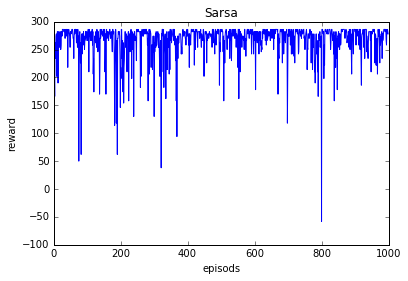

In [7]:
plt.plot(range(it), rewards)
plt.title('Sarsa')
plt.xlabel('episods')
plt.ylabel('reward')

In [8]:
grid = new_grid()
np.random.seed(0)

it = 100
rewards = []

for _ in range(it):

    s = grid[N-1, 0, 0]
    i, j, ind = s.next_state()

    curr_r = 0
    
    while True:       
        R = -2

        if (i, j, s.cows) not in grid.keys():
            cow = True
            for i_, j_, cow_ in grid:
                if i_ == i and j_ == j:
                    cow &= grid[i, j, cow_].cow_in_cell
            grid[i, j, s.cows] = Cell(i, j, cow, s.cows)

        if grid[i, j, s.cows].cow_in_cell:
            if (i, j, s.cows+1) not in grid.keys():
                grid[i, j, s.cows+1] = Cell(i, j, False, s.cows+1)
            s_ = grid[i, j, s.cows+1]
        else:
            s_ = grid[i, j, s.cows]

        if i == N-1 and j == 0 and s.cows == 3:
            R = 100 * s.cows

        s.value[ind] += α * (R + γ * np.max(s_.value) - s.value[ind])
        
        curr_r += R

        if s_.terminal:
            rewards.append(curr_r)
            break

        s = s_
        i, j, ind = s.next_state()

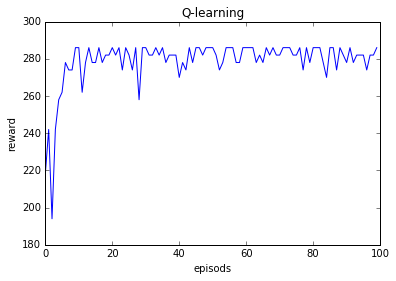

In [9]:
plt.plot(range(it), rewards)
plt.title('Q-learning')
plt.xlabel('episods')
plt.ylabel('reward')